In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.constraints import maxnorm
from keras.optimizers import SGD

from IPython.display import SVG,display
from keras.utils.vis_utils import model_to_dot

batch_size = 32
num_classes = 6
epochs = 1

Using TensorFlow backend.


In [2]:
def hot(y):
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(11))
    new_y = np.zeros((y.shape[0],y.shape[1]*num_classes))
    for i in range(len(y)):
        new_y[i,:] = label_binarizer.transform(y[i]).flatten()
    return new_y

In [3]:
X = np.load("modimages3.npy")
y = np.load("numtrain.npy")
y = keras.utils.to_categorical(y, num_classes)
"""y = np.delete(y,-1,1).astype(int)
y = hot(y)"""
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

In [4]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')

x_train shape: (30061, 28, 74, 3)
y_train shape: (30061, 6)
y_train shape: (30061, 6)
30061 train samples


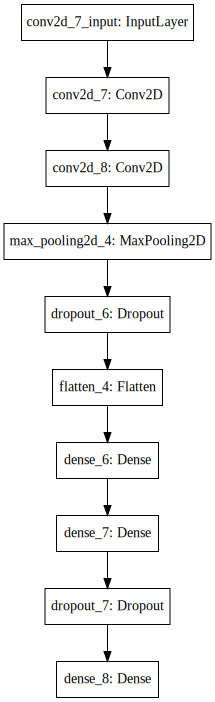

In [22]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

display(SVG(model_to_dot(model).create(prog='dot', format='svg')))
# load weights
#model.load_weights("weights.svhmbest.hdf5")

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [33]:
# checkpoint
filepath="weights.svhmbest.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpointer]

In [34]:
model.fit(x_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(x_test, y_test),
        shuffle=True,
        verbose=False,
        callbacks=[checkpointer])

Epoch 00000: val_acc improved from -inf to 0.54145, saving model to weights.svhmbest.hdf5


In [35]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save('svhm.h5')

Test loss: 7.39087770428
Test accuracy: 0.541454654438
